In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\info\.conda\envs\py27\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['np']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Joule Loss (X = 1.21983, Y = 1.215541, Z = 0..026782)

Hysteresis Loss(X = 0.986949,  Y = 0.987447, Z = 0.0272) 

In-plane = $\sqrt{X^{2}+Y^{2}}$ ,  Lamination=$\sqrt{Z^{2}}$

In [2]:
jl_x=1.21983
jl_y=1.215541
jl_z=0.026782
hl_x=0.986949
hl_y=0.987447
hl_Z=0.0272
jl_inplane=sqrt(jl_x**2+jl_y**2)
jl_lamin=sqrt(jl_z**2)
hl_inplane=sqrt(hl_x**2+jl_y**2)
hl_lamin=sqrt(hl_Z**2)
print 'Eddy Current Loss(in-plane) : %5.4fW' % jl_inplane
print 'Eddy Current Loss(lamination) : %5.4fW' % jl_lamin
print 'Hysteresis Loss(in-plane) : %5.4fW' % hl_inplane
print 'Hysteresis Loss(lamination)  : %5.4fW' % hl_lamin
print 'Totla Iron Loss  : %5.4fW' % float(hl_lamin+hl_inplane+jl_lamin+jl_inplane)


Eddy Current Loss(in-plane) : 1.7221W
Eddy Current Loss(lamination) : 0.0268W
Hysteresis Loss(in-plane) : 1.5658W
Hysteresis Loss(lamination)  : 0.0272W
Totla Iron Loss  : 3.3418W


<BarContainer object of 1 artists>

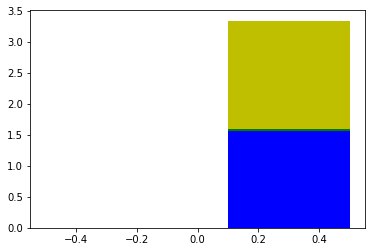

In [3]:
plt.bar(0,0,width=1)
plt.bar(0.3,hl_inplane,color='b' ,width=0.4)
plt.bar(0.3,hl_lamin,color='g',bottom=hl_inplane,width=0.4)
plt.bar(0.3,jl_inplane,color='y',bottom=hl_inplane+hl_lamin,width=0.4)
plt.bar(0.3,jl_lamin,color='y',bottom=hl_inplane+hl_lamin+jl_inplane,width=0.4)

In [3]:
from tempfile import NamedTemporaryFile
from os.path import basename
VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        
        f=NamedTemporaryFile(mode='w+b', suffix='.mp4', prefix='test')
        fname=basename(f.name)
        anim.save(fname, fps=20, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
        #print f.name
        video = open(fname, "rb").read()
    anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [5]:
#f=NamedTemporaryFile(mode='w+b', suffix='.mp4', prefix='tmp')
print f.name

AttributeError: 'builtin_function_or_method' object has no attribute 'name'

In [4]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

In [60]:
f.name.replace('\\','/')

'c:/users/jakal/appdata/local/temp/tmp2tkfpa.mp4'

In [71]:
import os
import glob
import sys

In [74]:
os.path.basename(f.name)

'tmpfgq9um.mp4'